# <center>CSU Curricula</center>



In order to execute the analyses provided in this notebook, you need to load the following Julia packages:

In [1]:
#using CurricularAnalytics
########## use this to run CA locally
using Pkg
if split(pwd(),Base.Filesystem.path_separator)[end] != "CurricularAnalytics.jl"
    cd("../../CurricularAnalytics.jl/")
end#
pkg"activate ."
using CurricularAnalytics
cd("../CA-Notebooks/CSU Curricula")
############
using Glob
using CSV
using DataFrames
using Statistics
using StatsPlots

┌ Info: Recompiling stale cache file /Users/heileman/.julia/compiled/v1.1/CurricularAnalytics/pJfqI.ji for CurricularAnalytics [593ffa3d-269e-5d81-88bc-c3b6809c35a6]
└ @ Base loading.jl:1184


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2013191039080776806\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2353522626416170248\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2013191039080776806\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Create the Data Structures 


Next, we will read each of the degree plans, and store them as `DegreePlan` objects in a `degree_plans` dictionary data structure.

In [2]:
degree_plans = Dict{String, DegreePlan}()
programs = glob("*", "./programs")
for program in programs
    program_name = replace(split("$(program)", "/")[end], ".csv" => "")
    degree_plans[program_name] = read_csv(program)
    complexity(degree_plans[program_name].curriculum)  # compute the curricular complexity of the degree plan
end

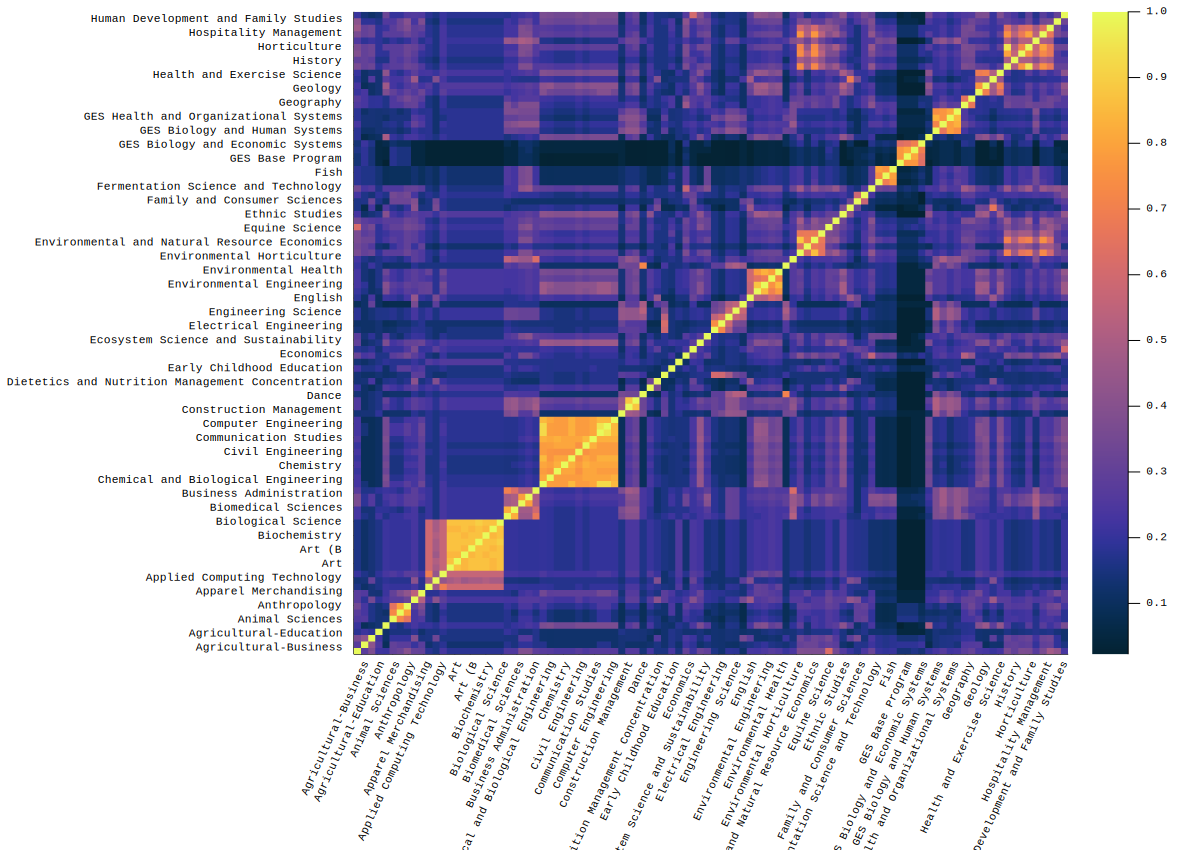

┌ Warning: GR: heatmap only supported with equally spaced data.
└ @ Plots /Users/heileman/.julia/packages/Plots/FQOz1/src/backends/gr.jl:944
┌ Warning: GR: heatmap only supported with equally spaced data.
└ @ Plots /Users/heileman/.julia/packages/Plots/FQOz1/src/backends/gr.jl:944


In [3]:
curricula = Array{Curriculum,1}()
for plan in values(degree_plans)
    push!(curricula, plan.curriculum)
end
show_homology(curricula)